In [1]:
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = pyedflib.EdfReader(r"D:\BaiduNetdiskDownload\sz1.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
record = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    record[i, :] = f.readSignal(i)

In [32]:
def plot_s1(sig,sig_name,start,stop,tick):
    plt.figure(figsize=(17,7))
    plt.plot(sig,label=sig_name)
    plt.xticks(interval(0,len(sig)-1,tick),fmat(np.linspace(start,stop,tick),2))
    plt.legend()
    plt.grid()

In [13]:
interval=lambda min_n,max_n,N:np.linspace(min_n,max_n,N)
def fmat(li,n):
    '''
    li中的元素保留n位有效数字
    '''
    for i in range(len(li)):
        li[i]=round(li[i],n)
    return li

In [3]:
import scipy.signal as signal #Butterworth滤波方法详见：https://blog.csdn.net/weixin_37996604/article/details/82864680

In [21]:
s56_57_03 = record[56][:3000] - record[57][:3000]
s56_03 = record[56][:3000]

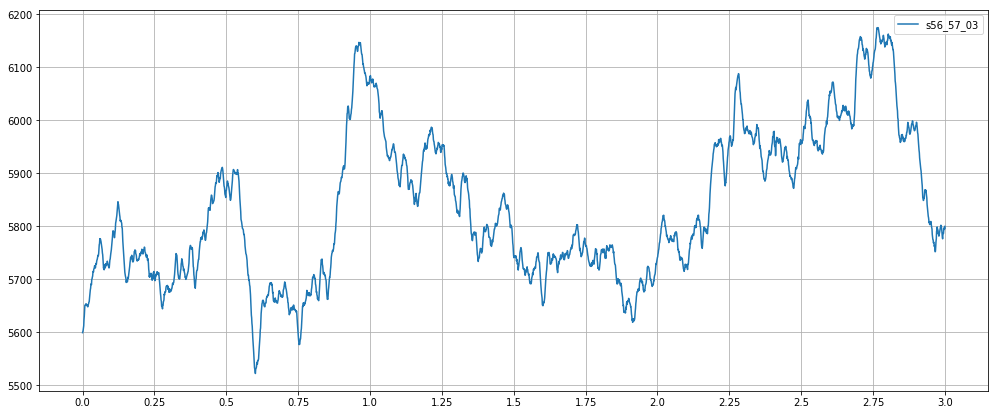

In [19]:
plt.figure(figsize=(17,7))
plt.plot(s56_57_03,label="s56_57_03")
plt.xticks(interval(0,len(s56_57_03)-1,13),fmat(np.linspace(0,3,13),2))
plt.legend()
plt.grid()

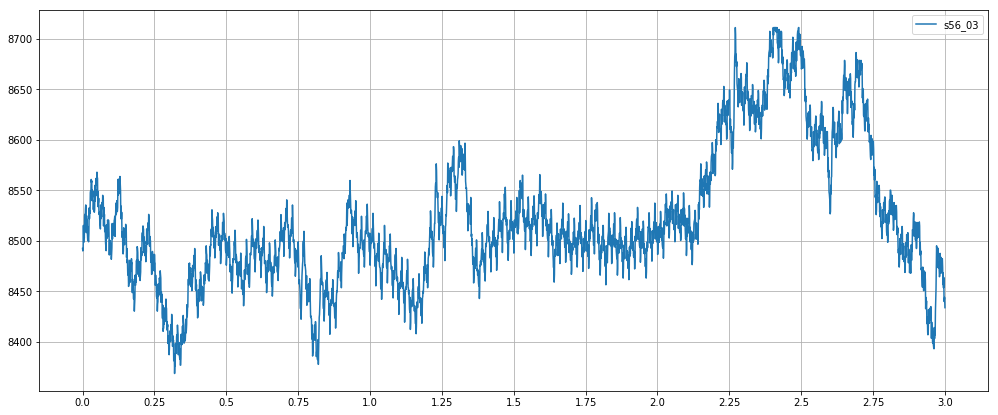

In [22]:
plt.figure(figsize=(17,7))
plt.plot(s56_03,label="s56_03")
plt.xticks(interval(0,len(s56_03)-1,13),fmat(np.linspace(0,3,13),2))
plt.legend()
plt.grid()

In [24]:
b1,a1 = signal.butter(2, [0.048,0.16], 'bandpass')  # gamma (24–80 Hz)，此信号的采样频率为1000，[0.048,0.16] （滤波器的阶数设置为2）
s56_03_filt = signal.filtfilt(b1,a1,s56_03)

D:\Software\Anaconda\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


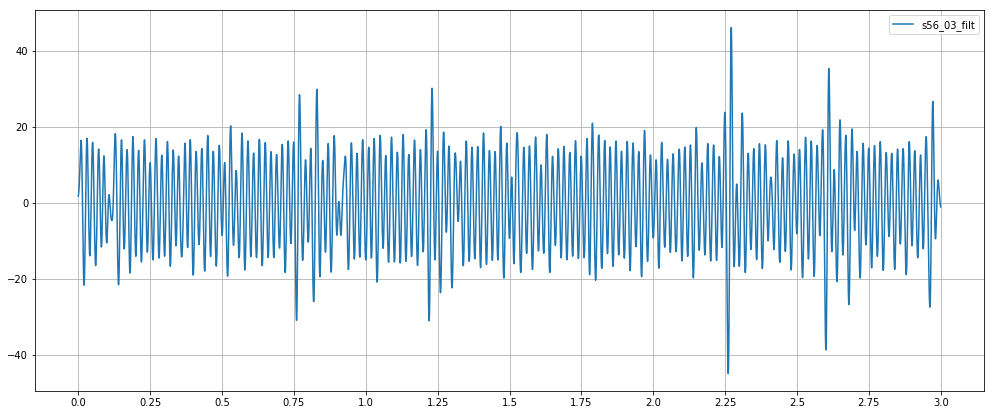

In [25]:
plt.figure(figsize=(17,7))
plt.plot(s56_03_filt,label="s56_03_filt")
plt.xticks(interval(0,len(s56_03_filt)-1,13),fmat(np.linspace(0,3,13),2))
plt.legend()
plt.grid()

In [26]:
np.mean(s56_03_filt)

0.028402398512253332

In [35]:
#信号的采样频率为1000（采用Butterworth滤波方法，滤波器的阶数设置为2）
b_delta,a_delta = signal.butter(2, [0.001,0.0068], 'bandpass')  # delta (0.5–3.4 Hz)
b_theta,a_theta = signal.butter(2, [0.0068,0.0148], 'bandpass')  # theta (3.4–7.4 Hz)
b_alpha,a_alpha = signal.butter(2, [0.0148,0.0248], 'bandpass')  # alpha (7.4–12.4 Hz)
b_beta,a_beta = signal.butter(2, [0.0248,0.048], 'bandpass')  # beta (12.4–24 Hz)
b_gamma,a_gamma = signal.butter(2, [0.048,0.16], 'bandpass')  # gamma (24–80 Hz)

In [36]:
s56_57_03_delta = signal.filtfilt(b_delta,a_delta,s56_57_03)
s56_57_03_theta = signal.filtfilt(b_theta,a_theta,s56_57_03)
s56_57_03_alpha = signal.filtfilt(b_alpha,a_alpha,s56_57_03)
s56_57_03_beta = signal.filtfilt(b_beta,a_beta,s56_57_03)
s56_57_03_gamma = signal.filtfilt(b_gamma,a_gamma,s56_57_03)

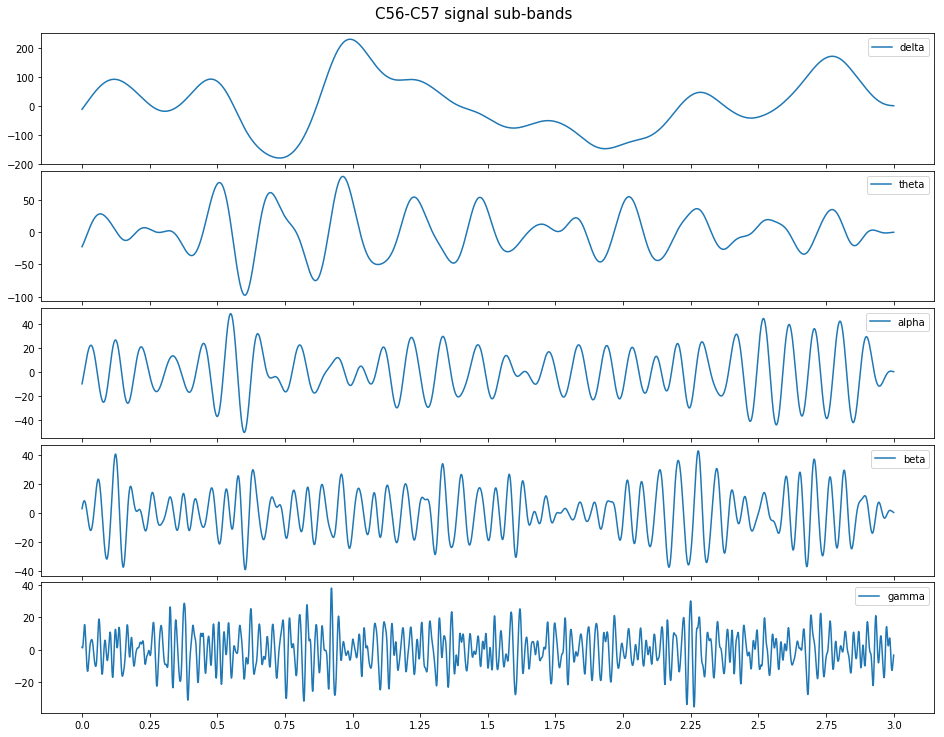

In [79]:
#plt.figure(figsize=(17,15))
f, axarr = plt.subplots(5, sharex=True, figsize=(16,12.5))
f.suptitle("C56-C57 signal sub-bands",fontsize=15,y=0.91)
axarr[0].plot(s56_57_03_delta,label="delta")
axarr[1].plot(s56_57_03_theta,label="theta")
axarr[2].plot(s56_57_03_alpha,label="alpha")
axarr[3].plot(s56_57_03_beta,label="beta")
axarr[4].plot(s56_57_03_gamma,label="gamma")
# 间距调整为０.1
f.subplots_adjust(hspace=0.05)
for ax in axarr:
    #ax.label_outer() # 设置全部标签在外部
    ax.legend()
plt.xticks(interval(0,len(s56_57_03)-1,13),fmat(np.linspace(0,3,13),2))
plt.show()

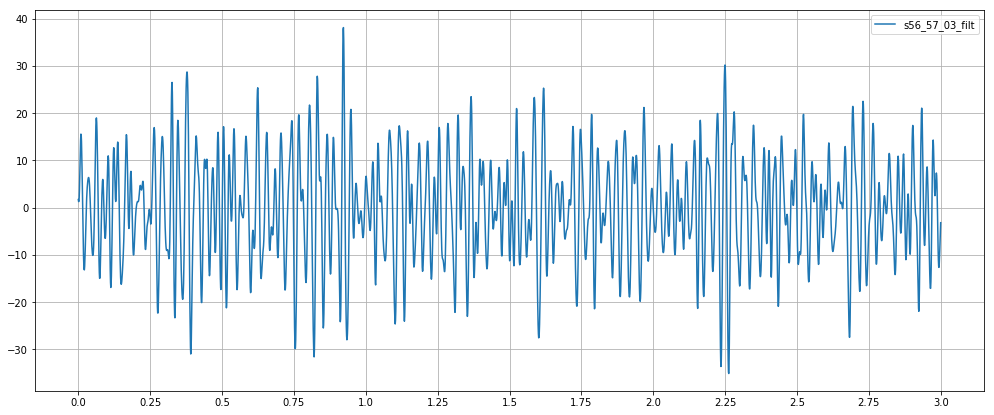

In [33]:
s56_57_03_gamma = signal.filtfilt(b_gamma,a_gamma,s56_57_03)
plot_s1(s56_57_03_gamma,"s56_57_03_gamma",0,3,13)

In [83]:
b_lt_90,a_lt_90 = signal.butter(2,0.18,"lowpass")
b_lt_80,a_lt_80 = signal.butter(2,0.16,"lowpass")

In [86]:
s56_57_03_lt90 = signal.filtfilt(b_lt_90,a_lt_90,s56_57_03)
s56_57_03_lt80 = signal.filtfilt(b_lt_80,a_lt_80,s56_57_03)
s56_03_lt80 = signal.filtfilt(b_lt_80,a_lt_80,s56_03)

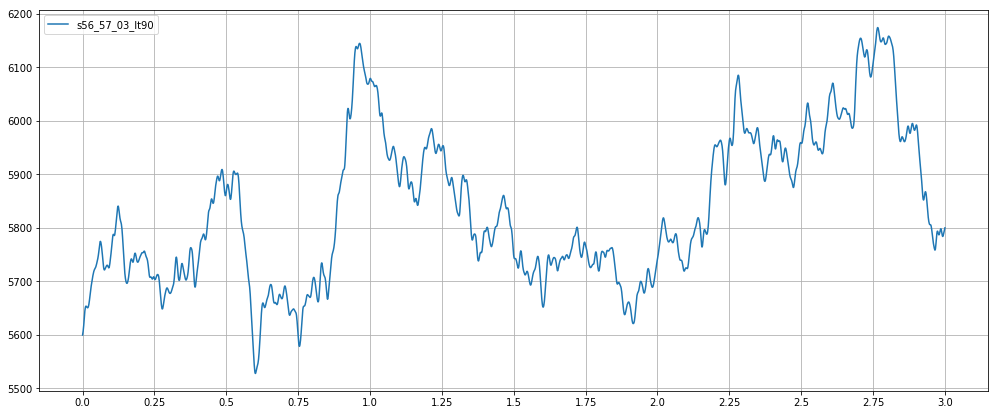

In [82]:
plot_s1(s56_57_03_lt90,"s56_57_03_lt90",0,3,13)

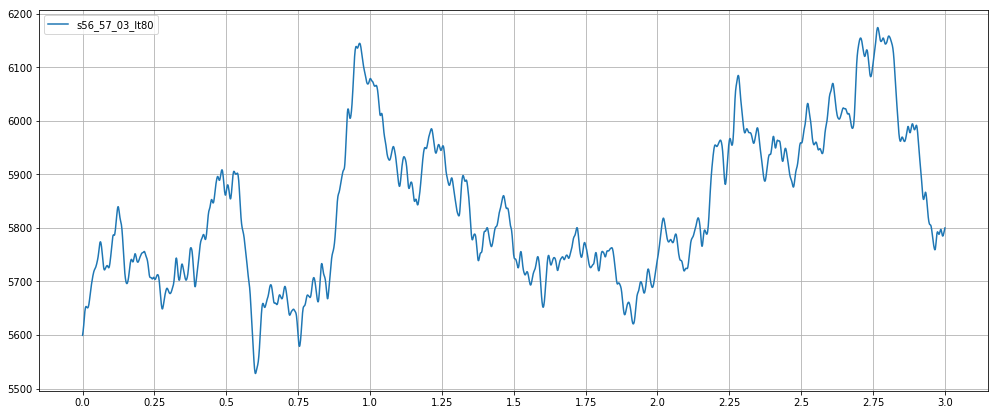

In [85]:
plot_s1(s56_57_03_lt80,"s56_57_03_lt80",0,3,13)

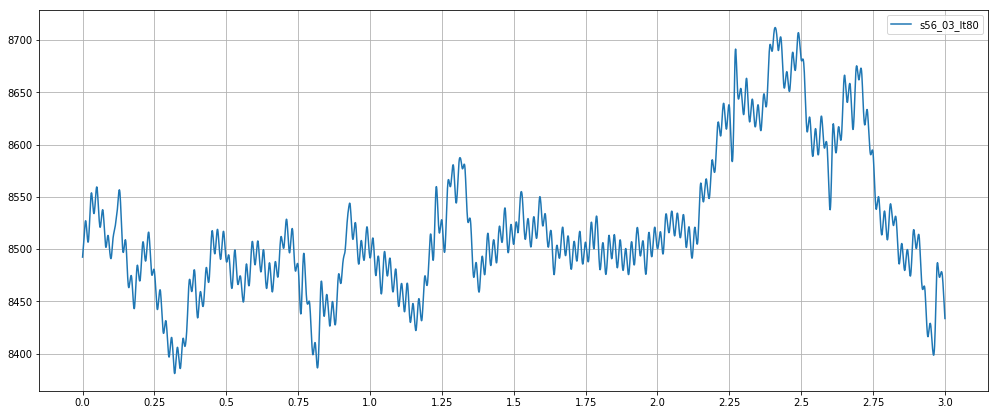

In [87]:
plot_s1(s56_03_lt80,"s56_03_lt80",0,3,13)